# 26. seaborn 라이브러리를 활용해서 그래프 그리기

히스토그램
* sns.histplot(data, bins=막대개수)
* data 하나만 표시 -> 단변량 그래프

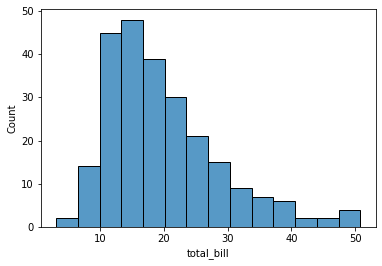

In [2]:
# 자동으로 예쁜 그림
# 커스터마이징 힘듦

import seaborn as sns
import matplotlib.pyplot as plt
tips = sns.load_dataset('tips')

# matplot과 seaborn 연동 가능
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax = sns.histplot(tips['total_bill'])

밀도 함수 그래프
*   sns.kdeplot(data) -> 단변량 그래프
*   sns.kdeplot(data1, data2) -> 이변량 그래프



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


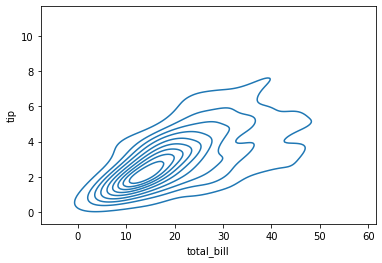

In [3]:
sns.kdeplot(tips['total_bill'],tips['tip'])

특정 값 개수 그래프
* sns.countplot(data) -> 단변량 그래프

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


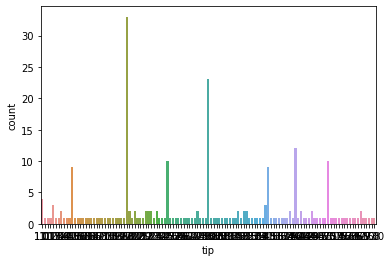

In [4]:
sns.countplot(tips['tip'])

산점도
* 회귀선까지 그려줌 
* sns.lmplot(x=data1, y=data2, data=dataframe) -> 이변량 그래프

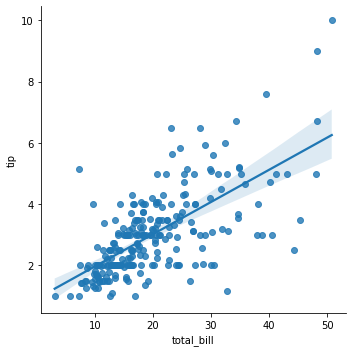

In [5]:
sns.lmplot(x='total_bill', y='tip', data=tips)

산점도 + 히스토그램
* sns.jointplot(x=data1, y=data2, data=dataframe) -> 이변량 그래프
* x축 히스토그램이 위에

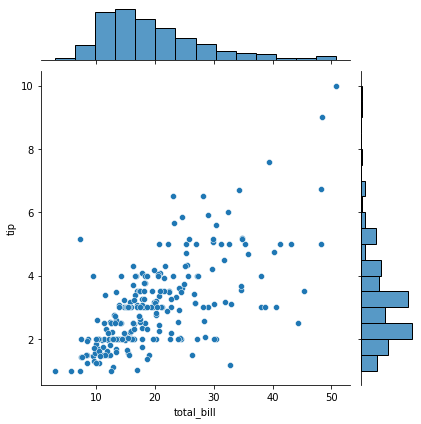

In [6]:
sns.jointplot(x='total_bill', y='tip', data=tips)

평균 막대 그래프

* sns.barplot(x=data1, y=data2, data=dataframe) -> 이변량 그래프
* 시간에 따라 total_bill의 평균
* 까만 선은 평균의 신뢰구간

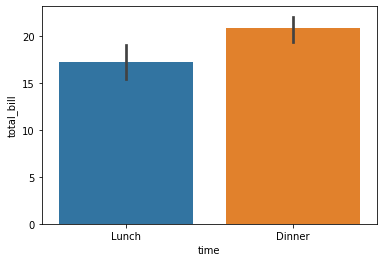

In [7]:
sns.barplot(x='time', y='total_bill', data=tips)

상자 그래프 
* sns.boxplot(x=data1, y=data2, data=dataframe) -> 이변량 그래프
*  시간별로 토탈빌의 상자그래프 
*  중간선이 median 그위는 75퍼 밑은 25퍼 
*  맨위 선은 upper fence -> 세로의 1.5배 위로

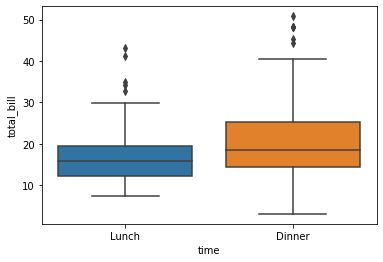

In [8]:
sns.boxplot(x='time', y='total_bill', data=tips)

바이올린 그래프
* sns.violinplot(x=data1, y=data2 , data=dataframe) -> 이변량 그래프
* 밀집도를 알수 있지만 눈에 잘 들어오지 않아서 자주 사용 안함

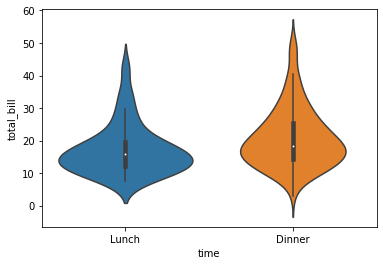

In [9]:
sns.violinplot(x='time', y='total_bill' , data=tips)

관계 그래프
* sns.pairplot(dataframe)

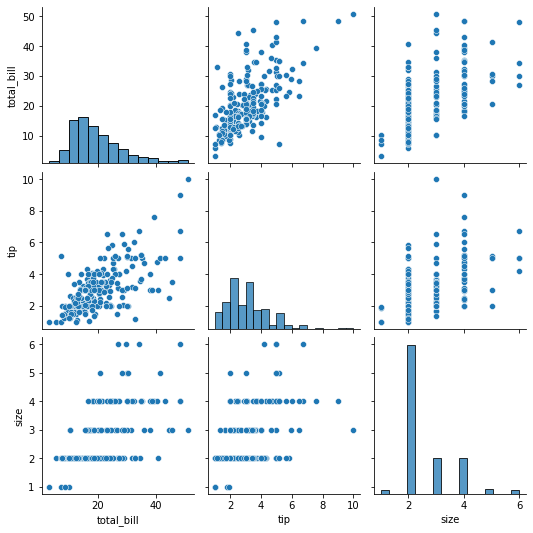

In [10]:
sns.pairplot(tips)

다변량 그래프 그리기
* 매개변수 hue = 색상 추가
* sns.violinplot(x=data1, y=data2, data=dataframe, hue=data3) -> 삼변량 그래프

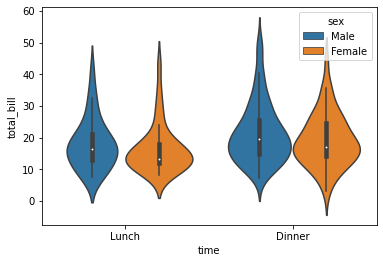

In [11]:
sns.violinplot(x='time', y='total_bill', data=tips, hue='sex')

# matplot의 c=''와 같음

* 매개면수 col = 집단별 그래프 그리기
* sns.lmplot(x=data1, y=data2, data=dataframe, col=data3) -> 삼변량 그래프

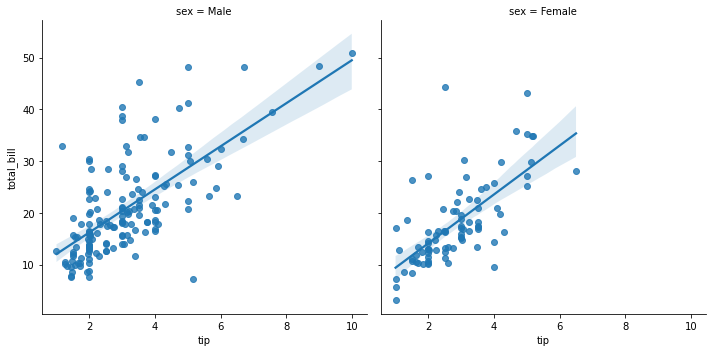

In [12]:
sns.lmplot(x='tip', y='total_bill', data=tips, col='sex')

* FacetGrid -> 집단별 그래프 그리기


In [13]:
from seaborn.axisgrid import FacetGrid
import seaborn as sns

# tips =sns.load_dataset("tips")
# sns.FacetGrid(tips, row='total_bill', col='tip')

* sns.set_style : 그래프 배경 설정

실습

In [14]:
import pandas as pd
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


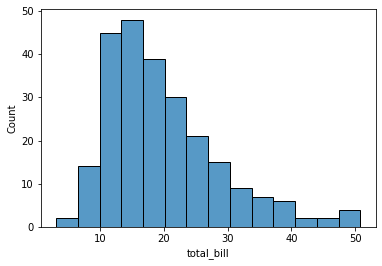

In [17]:
sns.histplot(tips['total_bill'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


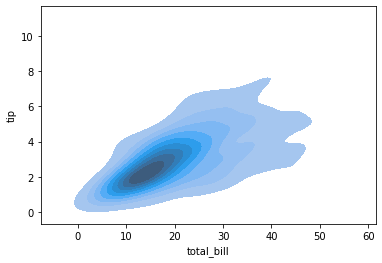

In [20]:
sns.kdeplot(tips['total_bill'],tips['tip'], shade=True)

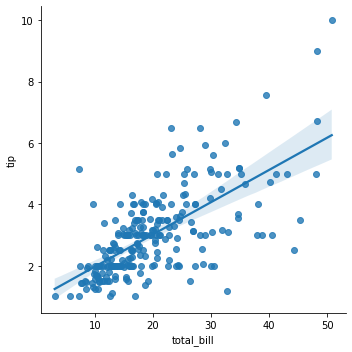

In [21]:
sns.lmplot(x='total_bill', y= 'tip', data=tips)

# 비례하는 모습

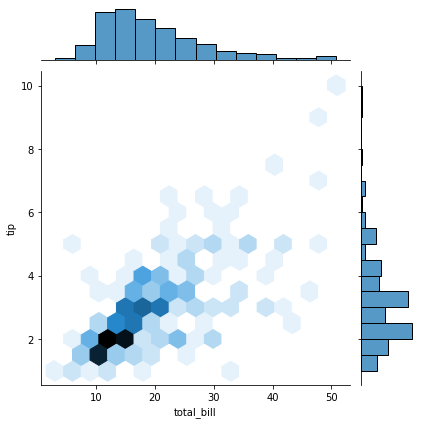

In [23]:
sns.jointplot(x='total_bill', y= 'tip', data=tips, kind='hex')

# 점이 겹칠수록 색이 진해짐

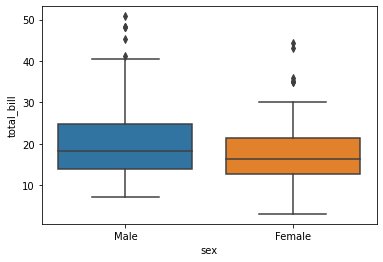

In [28]:
sns.boxplot(x= 'sex', y= 'total_bill', data=tips)

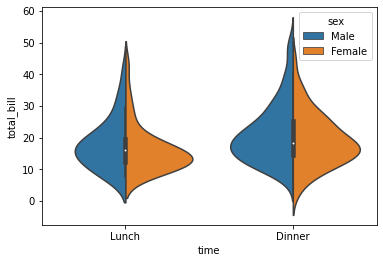

In [35]:
sns.violinplot(x= 'time', y= 'total_bill', data=tips, hue='sex', split=True)
# 반 자르기

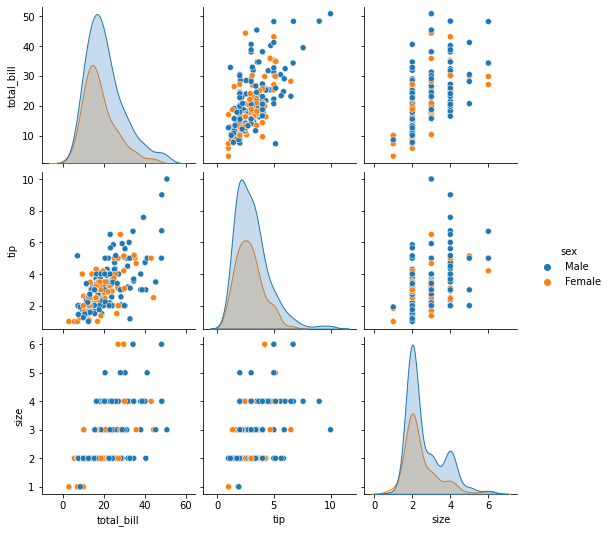

In [31]:
sns.pairplot(tips, hue='sex')

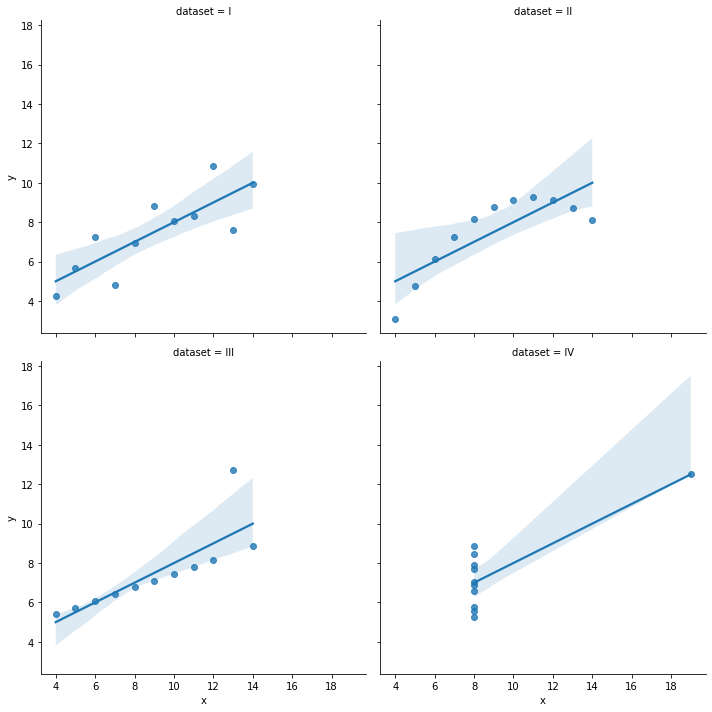

In [38]:
anscombe = sns.load_dataset("anscombe")
sns.lmplot(x='x',y='y', data=anscombe, col='dataset', col_wrap=2)

# dataset 별로 그림을 그려줌
# 한줄에 2개씩

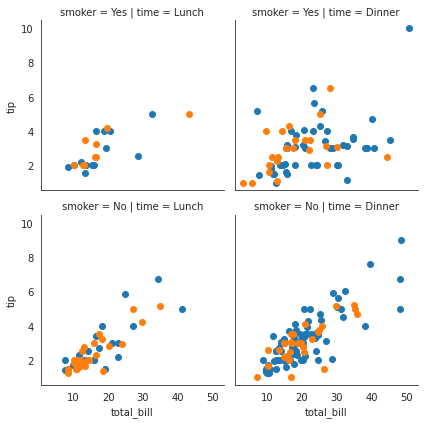

In [55]:
# 시간으로 도화지 세로 나누고 / 흡연여부로 가로 나누고 / 성별로 색 다르게
facet = sns.FacetGrid(tips, col='time', hue='sex', row='smoker')

# map으로 묶어서 도화지에 두개의 데이터로 scatter 그리기 
facet.map(plt.scatter, 'total_bill', 'tip')

# 배경에 격자
sns.set_style("whitegrid")

# 27. pandas 라이브러리를 활용해서 그래프 그리기
아주 간단한 그래프 (제출용x 확인용)

히스토그램
* dataframe[data1].plot.hist()
* dataframe[[data1,data2]].plot.hist()

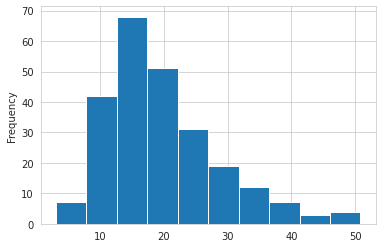

In [46]:
fig = plt.figure()
ax= fig.add_subplot(1,1,1)
ax = tips['total_bill'].plot.hist()
# 원하는 데이터에 접근 - 그림을 그리겠다 - 히스토그램 그림을

<function matplotlib.pyplot.show(*args, **kw)>

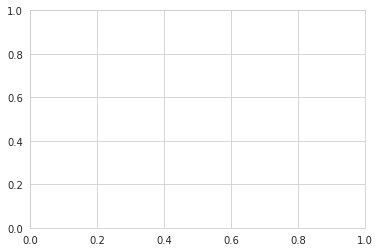

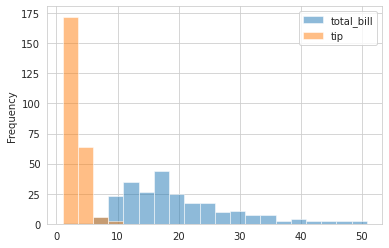

In [52]:
fig = plt.figure()
ax= fig.add_subplot(1,1,1)
ax = tips[['total_bill','tip']].plot.hist(alpha=0.5, bins=20)
# 투명도 / 막대 개수

밀도 함수 그래프

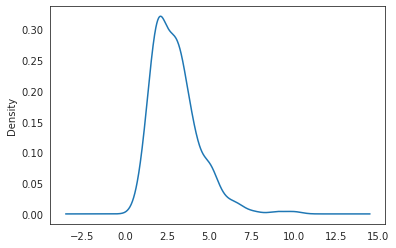

In [56]:
tips['tip'].plot.kde()

# 하나만 그릴거라면 바로 실행해도 문제없음

산점도

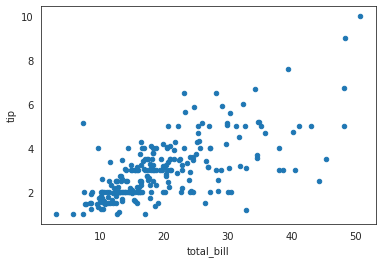

In [57]:
tips.plot.scatter(x='total_bill', y='tip')

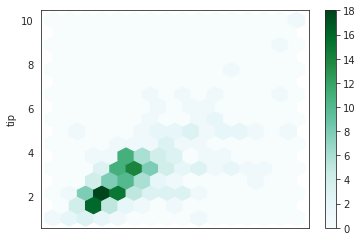

In [61]:
# 육각형 모양으로 얼마나 겹쳤는지 알 수 있다.

tips.plot.hexbin(x='total_bill', y='tip', gridsize=15)
# 그리드 사이즈로 크기조절 -> 숫자 클수록 작아짐

원형 그림

In [64]:
tips.plot.pie(x='day', y='sex')

ValueError: ignored

실습

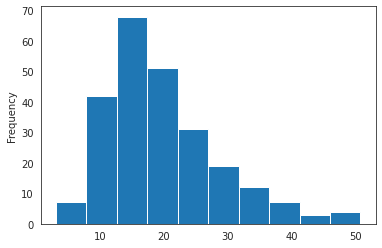

In [65]:
tips['total_bill'].plot.hist()

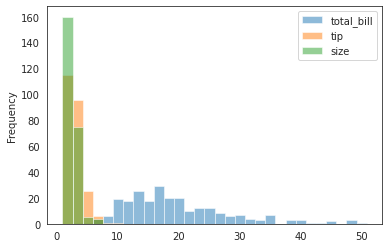

In [67]:
tips[['total_bill','tip','size']].plot.hist(alpha=0.5, bins=30)

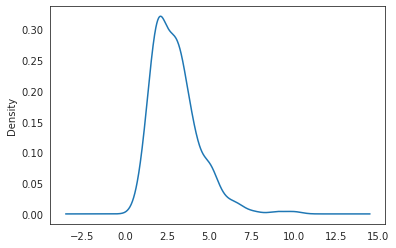

In [68]:
tips['tip'].plot.kde()

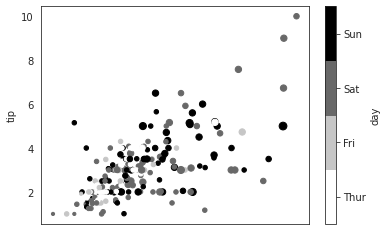

In [74]:
tips.plot.scatter(x= 'total_bill', y='tip', c='day', s=tips['size']*10)
# c 별로 색이 다르고 s 별로 사이즈가 다름 사이즈 크기는 * 로 키울수 있다.

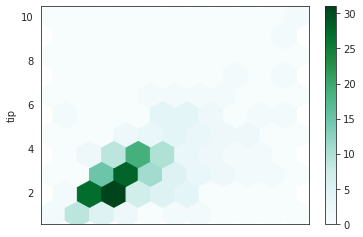

In [76]:
tips.plot.hexbin(x='total_bill', y='tip', gridsize=10)

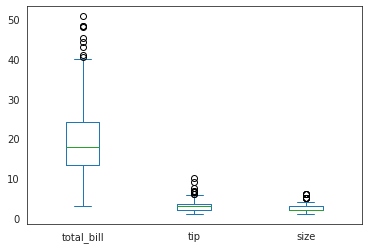

In [77]:
tips.plot.box()

# 숫자로 된 데이터들만 전부 그려줌 

# 28. 여러 개의 데이터 프레임을 합치는 방법

concat
* 여러 개의 데이터 프레임을 하나의 데이터 프레임으로 합치는 함수
* pd.concat([df1,df2,,], axis=1) -> 열 이름을 기준으로 합치기 (세로로 연결)
* pd.concat([df1,df2,,], axis=1) -> 행 이름을 기준으로 합치기 (가로로 연결)
* 행 이름 바꾸기: df.index = [...]
* 열 이름 바꾸기: df.columns = [...]

In [80]:
df1 = pd.read_csv("concat_1.csv")
df2 = pd.read_csv("concat_2.csv")
df3 = pd.read_csv("concat_3.csv")

In [81]:
df1

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3


In [82]:
df2

,A,B,C,D
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7


In [83]:
df3

,A,B,C,D
0,a8,b8,c8,d8
1,a9,b9,c9,d9
2,a10,b10,c10,d10
3,a11,b11,c11,d11


In [89]:
# 그냥 밑으로 붙여줌 -> 행번호 유지
concat1 = pd.concat([df1,df2,df3])
concat1
# 꼭 하나로 감싸줘야 함

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7
0,a8,b8,c8,d8
1,a9,b9,c9,d9


In [90]:
concat1.loc[0]

,A,B,C,D
0,a0,b0,c0,d0
0,a4,b4,c4,d4
0,a8,b8,c8,d8


In [92]:
# 원래 행 이름을 무시하고 다시 만들기
concat11 = pd.concat([df1,df2,df3], ignore_index=True)
concat11

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


In [96]:
# 가로로 합칠 때 (행기준)
concat2 = pd.concat([df1,df2,df3], axis=1)
concat2

,A,B,C,D,A,B,C,D,A,B,C,D
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11


In [94]:
concat2['A']

,A,A,A
0,a0,a4,a8
1,a1,a5,a9
2,a2,a6,a10
3,a3,a7,a11


In [97]:
# 원래 열 이름 무시하고 다시 만들어줌
concat22 = pd.concat([df1,df2,df3], axis=1, ignore_index=True)
concat22

,0,1,2,3,4,5,6,7,8,9,10,11
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11


In [99]:
# 행 이름이 다른 데이터프레임이 있어도 행 기준으로 합쳐줄까?
df2.index = [0,3,5,7]
df2

,A,B,C,D
0,a4,b4,c4,d4
3,a5,b5,c5,d5
5,a6,b6,c6,d6
7,a7,b7,c7,d7


In [126]:
concat3 = pd.concat([df1,df2,df3], axis=1)
concat3
# 합쳐주긴 하지만 NaN 값으로 채워짐

,A,B,C,D,A,C,E,F,A,B,C,D
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8
1,a1,b1,c1,d1,NaN,NaN,NaN,NaN,a9,b9,c9,d9
2,a2,b2,c2,d2,NaN,NaN,NaN,NaN,a10,b10,c10,d10
3,a3,b3,c3,d3,a5,b5,c5,d5,a11,b11,c11,d11
5,NaN,NaN,NaN,NaN,a6,b6,c6,d6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,a7,b7,c7,d7,NaN,NaN,NaN,NaN


In [103]:
df2.columns=['A',"C","E","F"]
df2

,A,C,E,F
0,a4,b4,c4,d4
3,a5,b5,c5,d5
5,a6,b6,c6,d6
7,a7,b7,c7,d7


In [127]:
concat33= pd.concat([df1,df2,df3], axis=0)
concat33

,A,B,C,D,E,F
0,a0,b0,c0,d0,NaN,NaN
1,a1,b1,c1,d1,NaN,NaN
2,a2,b2,c2,d2,NaN,NaN
3,a3,b3,c3,d3,NaN,NaN
0,a4,NaN,b4,NaN,c4,d4
3,a5,NaN,b5,NaN,c5,d5
5,a6,NaN,b6,NaN,c6,d6
7,a7,NaN,b7,NaN,c7,d7
0,a8,b8,c8,d8,NaN,NaN
1,a9,b9,c9,d9,NaN,NaN


# 29. 스마트하게 데이터 프레임을 합치는 방법

merge
* 특정 열을 기준으로 데이터 프레임을 합치는 방법
* 이름이 아닌 열의 데이터를 기준으로 합침
* 두개를 합쳐줌
* df1.merge(df2, left_on = df1의 기준 열, right_on=df2의 기준 열)
* 기준열의 이름이 서로 같은 경우 on = 기준열 


In [106]:
person = pd.read_csv("survey_person.csv")
site = pd.read_csv("survey_site.csv")
survey = pd.read_csv("survey_survey.csv")
visited = pd.read_csv("survey_visited.csv")

In [107]:
person

,ident,personal,family
0,dyer,William,Dyer
1,pb,Frank,Pabodie
2,lake,Anderson,Lake
3,roe,Valentina,Roerich
4,danforth,Frank,Danforth


In [108]:
site

,name,lat,long
0,DR-1,-49.85,-128.57
1,DR-3,-47.15,-126.72
2,MSK-4,-48.87,-123.40


In [109]:
survey

,taken,person,quant,reading
0,619,dyer,rad,9.82
1,619,dyer,sal,0.13
2,622,dyer,rad,7.80
3,622,dyer,sal,0.09
4,734,pb,rad,8.41
5,734,lake,sal,0.05
6,734,pb,temp,-21.50
7,735,pb,rad,7.22
8,735,NaN,sal,0.06
9,735,NaN,temp,-26.00


In [110]:
visited

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,NaN
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


In [112]:
merge1 = visited.merge(site, left_on='site', right_on='name')
merge1

,ident,site,dated,name,lat,long
0,619,DR-1,1927-02-08,DR-1,-49.85,-128.57
1,622,DR-1,1927-02-10,DR-1,-49.85,-128.57
2,844,DR-1,1932-03-22,DR-1,-49.85,-128.57
3,734,DR-3,1939-01-07,DR-3,-47.15,-126.72
4,735,DR-3,1930-01-12,DR-3,-47.15,-126.72
5,751,DR-3,1930-02-26,DR-3,-47.15,-126.72
6,752,DR-3,NaN,DR-3,-47.15,-126.72
7,837,MSK-4,1932-01-14,MSK-4,-48.87,-123.40


In [113]:
# 중복된 기준열을 하나 삭제함

del merge1['name']
merge1

,ident,site,dated,lat,long
0,619,DR-1,1927-02-08,-49.85,-128.57
1,622,DR-1,1927-02-10,-49.85,-128.57
2,844,DR-1,1932-03-22,-49.85,-128.57
3,734,DR-3,1939-01-07,-47.15,-126.72
4,735,DR-3,1930-01-12,-47.15,-126.72
5,751,DR-3,1930-02-26,-47.15,-126.72
6,752,DR-3,NaN,-47.15,-126.72
7,837,MSK-4,1932-01-14,-48.87,-123.40


In [114]:
merge2 = survey.merge(person, left_on='person', right_on='ident')
merge2

,taken,person,quant,reading,ident,personal,family
0,619,dyer,rad,9.82,dyer,William,Dyer
1,619,dyer,sal,0.13,dyer,William,Dyer
2,622,dyer,rad,7.80,dyer,William,Dyer
3,622,dyer,sal,0.09,dyer,William,Dyer
4,734,pb,rad,8.41,pb,Frank,Pabodie
5,734,pb,temp,-21.50,pb,Frank,Pabodie
6,735,pb,rad,7.22,pb,Frank,Pabodie
7,751,pb,rad,4.35,pb,Frank,Pabodie
8,751,pb,temp,-18.50,pb,Frank,Pabodie
9,734,lake,sal,0.05,lake,Anderson,Lake


In [115]:
del merge2['ident']
merge2

,taken,person,quant,reading,personal,family
0,619,dyer,rad,9.82,William,Dyer
1,619,dyer,sal,0.13,William,Dyer
2,622,dyer,rad,7.80,William,Dyer
3,622,dyer,sal,0.09,William,Dyer
4,734,pb,rad,8.41,Frank,Pabodie
5,734,pb,temp,-21.50,Frank,Pabodie
6,735,pb,rad,7.22,Frank,Pabodie
7,751,pb,rad,4.35,Frank,Pabodie
8,751,pb,temp,-18.50,Frank,Pabodie
9,734,lake,sal,0.05,Anderson,Lake


# 30. 누락값을 처리하는 방법

누락값
* 비어있는 값
* 누락값이 하나라도 있다면 데이터분석 및 연산이 원활하지 못할 수 있음
* 데이터 마다 채우는 방법이 달라짐 -> 시계열(경향이있는 데이터) 일 경우 앞/뒤 값으로 채우거나 둘의 평균으로 채움

In [116]:
# 누락값을 일부러 만들 수도 있음
from numpy import nan

* 누락값은 비교할 수 없음 단, pd.isnull() 함수로 누락값인지 아닌지 판단 가능
* if 누락값 = nan 해도 판단 불가능
* pd.isnull(값) -> null이면 True
* pd.notnull(값) -> null 이면 False

누락값 개수 구하기

In [128]:
import numpy as np
np.count_nonzero(concat3.isnull())

# null인 데이터는 True = 1 -> nonzero의 개수가 null 값의 개수

24

In [129]:
concat3

,A,B,C,D,A,C,E,F,A,B,C,D
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8
1,a1,b1,c1,d1,NaN,NaN,NaN,NaN,a9,b9,c9,d9
2,a2,b2,c2,d2,NaN,NaN,NaN,NaN,a10,b10,c10,d10
3,a3,b3,c3,d3,a5,b5,c5,d5,a11,b11,c11,d11
5,NaN,NaN,NaN,NaN,a6,b6,c6,d6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,a7,b7,c7,d7,NaN,NaN,NaN,NaN


In [132]:
# 누락값이 아닌 데이터 개수 - df.count()
concat3.count().sum()

48

In [141]:
# 누락값을 포함한 데이터 개수
concat33['B'].value_counts(dropna=False)

# 둘을 빼면 누락값 개수 알 수 있음

NaN    4
b0     1
b1     1
b2     1
b3     1
b8     1
b9     1
b10    1
b11    1
Name: B, dtype: int64

In [142]:
concat33['B'].value_counts(dropna=True)

b0     1
b1     1
b2     1
b3     1
b8     1
b9     1
b10    1
b11    1
Name: B, dtype: int64

누락값 채우기
* fillna(값) -> 값으로 누락값 채운다
* fillna(method= 'ffill') -> 앞의 값으로 채운다
* fillna(method= 'bfill') -> 뒤의 값으로 채운다
* df.interpolate() -> 흐름에 따라 채운다.-> 평균으로 채우는 것이 아님, 값이 다 다르게 들어 갈 수 있음

실습

In [143]:
ebola = pd.read_csv("country_timeseries.csv")
ebola

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
# 데이터 개수: 열마다 122행
ebola.info()

# non-null count가 122 보다 작으면 결측값이 있는것

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [146]:
# 누락값 개수
122 - ebola.count()

Date                     0
Day                      0
Cases_Guinea            29
Cases_Liberia           39
Cases_SierraLeone       35
Cases_Nigeria           84
Cases_Senegal           97
Cases_UnitedStates     104
Cases_Spain            106
Cases_Mali             110
Deaths_Guinea           30
Deaths_Liberia          41
Deaths_SierraLeone      35
Deaths_Nigeria          84
Deaths_Senegal         100
Deaths_UnitedStates    104
Deaths_Spain           106
Deaths_Mali            110
dtype: int64

In [147]:
# 누락값 채우기
ebola.fillna(5)

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,5.0,10030.0,5.0,5.0,5.0,5.0,5.0,1786.0,5.0,2977.0,5.0,5.0,5.0,5.0,5.0
1,1/4/2015,288,2775.0,5.0,9780.0,5.0,5.0,5.0,5.0,5.0,1781.0,5.0,2943.0,5.0,5.0,5.0,5.0,5.0
2,1/3/2015,287,2769.0,8166.0,9722.0,5.0,5.0,5.0,5.0,5.0,1767.0,3496.0,2915.0,5.0,5.0,5.0,5.0,5.0
3,1/2/2015,286,5.0,8157.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3496.0,5.0,5.0,5.0,5.0,5.0,5.0
4,12/31/2014,284,2730.0,8115.0,9633.0,5.0,5.0,5.0,5.0,5.0,1739.0,3471.0,2827.0,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,5.0,5.0,5.0,5.0,5.0,66.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0
118,3/26/2014,4,86.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,62.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
119,3/25/2014,3,86.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,60.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
120,3/24/2014,2,86.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,59.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


In [150]:
# 평균값으로 채우기
ebola.fillna(ebola.mean())

# 시계열 데이터이기 때문에 평균 값으로 채우면 흐름이 이상해짐

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.000000,2335.337349,10030.000000,16.736842,1.08,3.277778,1.0,3.5,1786.00000,1101.209877,2977.000000,6.131579,0.0,0.833333,0.1875,3.166667
1,1/4/2015,288,2775.000000,2335.337349,9780.000000,16.736842,1.08,3.277778,1.0,3.5,1781.00000,1101.209877,2943.000000,6.131579,0.0,0.833333,0.1875,3.166667
2,1/3/2015,287,2769.000000,8166.000000,9722.000000,16.736842,1.08,3.277778,1.0,3.5,1767.00000,3496.000000,2915.000000,6.131579,0.0,0.833333,0.1875,3.166667
3,1/2/2015,286,911.064516,8157.000000,2427.367816,16.736842,1.08,3.277778,1.0,3.5,563.23913,3496.000000,693.701149,6.131579,0.0,0.833333,0.1875,3.166667
4,12/31/2014,284,2730.000000,8115.000000,9633.000000,16.736842,1.08,3.277778,1.0,3.5,1739.00000,3471.000000,2827.000000,6.131579,0.0,0.833333,0.1875,3.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.000000,8.000000,6.000000,16.736842,1.08,3.277778,1.0,3.5,66.00000,6.000000,5.000000,6.131579,0.0,0.833333,0.1875,3.166667
118,3/26/2014,4,86.000000,2335.337349,2427.367816,16.736842,1.08,3.277778,1.0,3.5,62.00000,1101.209877,693.701149,6.131579,0.0,0.833333,0.1875,3.166667
119,3/25/2014,3,86.000000,2335.337349,2427.367816,16.736842,1.08,3.277778,1.0,3.5,60.00000,1101.209877,693.701149,6.131579,0.0,0.833333,0.1875,3.166667
120,3/24/2014,2,86.000000,2335.337349,2427.367816,16.736842,1.08,3.277778,1.0,3.5,59.00000,1101.209877,693.701149,6.131579,0.0,0.833333,0.1875,3.166667


In [151]:
# 이전 값으로 채우기 -> 맨 앞 값이 nan 이면 안채워짐
ebola.fillna(method='ffill')

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,2769.0,8157.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,66.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
118,3/26/2014,4,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,62.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
119,3/25/2014,3,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,60.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
120,3/24/2014,2,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,59.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0


In [152]:
# 이후 값으로 채우기 -> 맨 뒤 값이 nan 이면 안채워짐
ebola.fillna(method='bfill')

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,8166.0,10030.0,20.0,1.0,4.0,1.0,7.0,1786.0,3496.0,2977.0,8.0,0.0,1.0,0.0,6.0
1,1/4/2015,288,2775.0,8166.0,9780.0,20.0,1.0,4.0,1.0,7.0,1781.0,3496.0,2943.0,8.0,0.0,1.0,0.0,6.0
2,1/3/2015,287,2769.0,8166.0,9722.0,20.0,1.0,4.0,1.0,7.0,1767.0,3496.0,2915.0,8.0,0.0,1.0,0.0,6.0
3,1/2/2015,286,2730.0,8157.0,9633.0,20.0,1.0,4.0,1.0,7.0,1739.0,3496.0,2827.0,8.0,0.0,1.0,0.0,6.0
4,12/31/2014,284,2730.0,8115.0,9633.0,20.0,1.0,4.0,1.0,7.0,1739.0,3471.0,2827.0,8.0,0.0,1.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
# 흐름에 따라 누락값을 채워줌 -> 흐름을 모르면 채워지지 않는다.

ebola.interpolate()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,2749.5,8157.0,9677.5,NaN,NaN,NaN,NaN,NaN,1753.0,3496.0,2871.0,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,66.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
118,3/26/2014,4,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,62.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
119,3/25/2014,3,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,60.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
120,3/24/2014,2,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,59.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0


In [154]:
# 실무에서는?
# 일단 흐름에 따라 채워주고 앞의 값으로 채워주고 뒤의 값으로 채워줌
# 결측값이 모두 채워짐

ebola2 = ebola.interpolate()
ebola2 = ebola2.fillna(method = 'ffill')
ebola2 = ebola2.fillna(method = 'bfill')
ebola2

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,8166.0,10030.0,20.0,1.0,4.0,1.0,7.0,1786.0,3496.0,2977.0,8.0,0.0,1.0,0.0,6.0
1,1/4/2015,288,2775.0,8166.0,9780.0,20.0,1.0,4.0,1.0,7.0,1781.0,3496.0,2943.0,8.0,0.0,1.0,0.0,6.0
2,1/3/2015,287,2769.0,8166.0,9722.0,20.0,1.0,4.0,1.0,7.0,1767.0,3496.0,2915.0,8.0,0.0,1.0,0.0,6.0
3,1/2/2015,286,2749.5,8157.0,9677.5,20.0,1.0,4.0,1.0,7.0,1753.0,3496.0,2871.0,8.0,0.0,1.0,0.0,6.0
4,12/31/2014,284,2730.0,8115.0,9633.0,20.0,1.0,4.0,1.0,7.0,1739.0,3471.0,2827.0,8.0,0.0,1.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,66.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
118,3/26/2014,4,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,62.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
119,3/25/2014,3,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,60.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
120,3/24/2014,2,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,59.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0


In [156]:
# 날짜 데이터를 만들어준 후 인덱스로

dates = ['12/1/2016', '12/3/2016', '12,4,2016', '12/10/2016']
dates = pd.to_datetime(dates)

s=pd.Series([1,nan,nan,10], index=dates)
s

2016-12-01     1.0
2016-12-03     NaN
2016-12-01     NaN
2016-12-10    10.0
dtype: float64

In [157]:
# 흐름에 맞게 채워줌

s.interpolate()

2016-12-01     1.0
2016-12-03     4.0
2016-12-01     7.0
2016-12-10    10.0
dtype: float64

In [158]:
# 시간에 맞게 채워줌

s.interpolate(method='time')

2016-12-01     1.0
2016-12-03     3.0
2016-12-01     1.0
2016-12-10    10.0
dtype: float64